In [19]:
import csv
import math
import heapq
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [20]:
# Load cities from csv
cities = {}
with open('filtered_cities.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        city_ascii = row['city_ascii']
        lat = float(row['lat'])
        lng = float(row['lng'])
        cities[city_ascii] = (lat, lng)

In [21]:
#Distance finder function
def haversine(coord1, coord2):
    R = 6371
    dlat = math.radians(coord2[0] - coord1[0])
    dlon = math.radians(coord2[1] - coord1[1])
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(coord1[0])) * math.cos(math.radians(coord2[0])) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

In [22]:
def nearest_city(coords, cities_dict):
    closest_city = None
    shortest_distance = float('inf')
    
    for city, city_coords in cities_dict.items():
        dist = haversine(coords, city_coords)
        if dist < shortest_distance:
            closest_city = city
            shortest_distance = dist
            
    return closest_city

In [23]:
def add_coords(start, end, cities_dict):
    
    # Checks if start is not a string
    if not isinstance(start, str):
        cities_dict["START"] = start
        print(cities_dict["START"])

    # Checks if end is not a string
    if not isinstance(end, str):
        cities_dict["END"] = end
        print(cities_dict["END"])

    return cities_dict

In [24]:
def check_loc_coord(start, end):
    if not isinstance(start, str):
        return True

In [25]:
def a_star_search(start_city, end_city, cities_dict, distance_threshold=1000):
          
    # Lookup city coordinates directly from the dictionary
    start_coords = cities_dict[start_city]
    end_coords = cities_dict[end_city]
    
    open_set = [(0, start_coords)]
    came_from = {}
    g_score = {coord: float('inf') for coord in cities_dict.values()}
    g_score[start_coords] = 0
    f_score = {coord: float('inf') for coord in cities_dict.values()}
    f_score[start_coords] = haversine(start_coords, end_coords)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == end_coords:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(current)
            return path[::-1]

        for neighbor in cities_dict.values():
            dist = haversine(current, neighbor)
            if dist > distance_threshold:
                continue

            tentative_g_score = g_score[current] + dist
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + haversine(neighbor, end_coords)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return []


In [26]:
def total_path_distance(path):
    return sum(haversine(path[i], path[i+1]) for i in range(len(path)-1))

(-6.0926, -59.5509)
(17.65545, 30.839038)


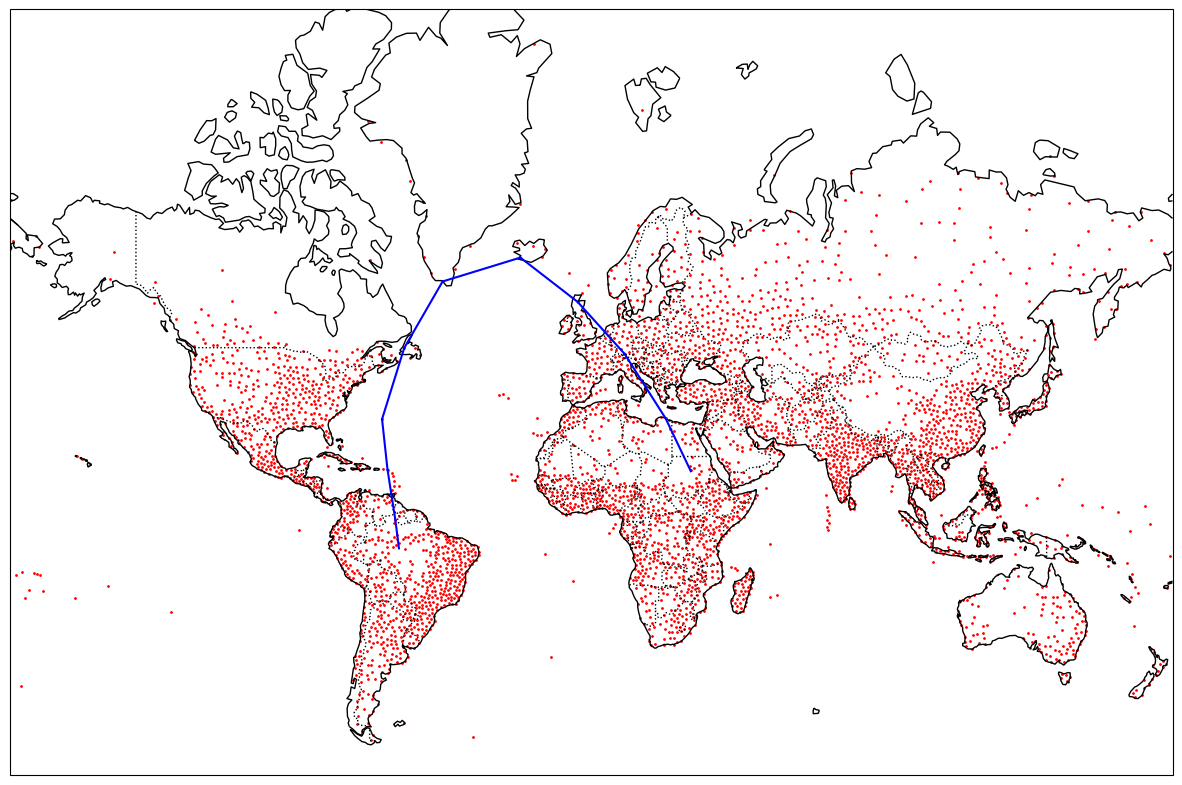

In [27]:
#Size
plt.figure(figsize=(15, 12))
#Type
ax = plt.axes(projection=ccrs.Mercator())
#Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
#Draw cities
ax.scatter([lng for _, (lat, lng) in cities.items()], [lat for _, (lat, lng) in cities.items()], color="red", s=1, transform=ccrs.PlateCarree())

#Run a*
start = (-6.0926, -59.5509)  # Middle of no where Canada
end = (17.655450, 30.839038)  # Middle of no where Guatemala

#start = "Tatarsk"
#end = "Lima"

if check_loc_coord:
    cities_dict = add_coords(start, end, cities)
    path = a_star_search("START", "END", cities_dict, distance_threshold=2000)

else:
    path = a_star_search(start, end, cities, distance_threshold=2000)

for i in range(len(path)-1):
    ax.plot([path[i][1], path[i+1][1]], [path[i][0], path[i+1][0]], color='blue', transform=ccrs.PlateCarree())

plt.show()
